## Projeto 1 - Trans cal 

Luiza Coutinho /
Daniel Marco /
Gabriel Buhrer /
Fernando Koelle


Sistema par

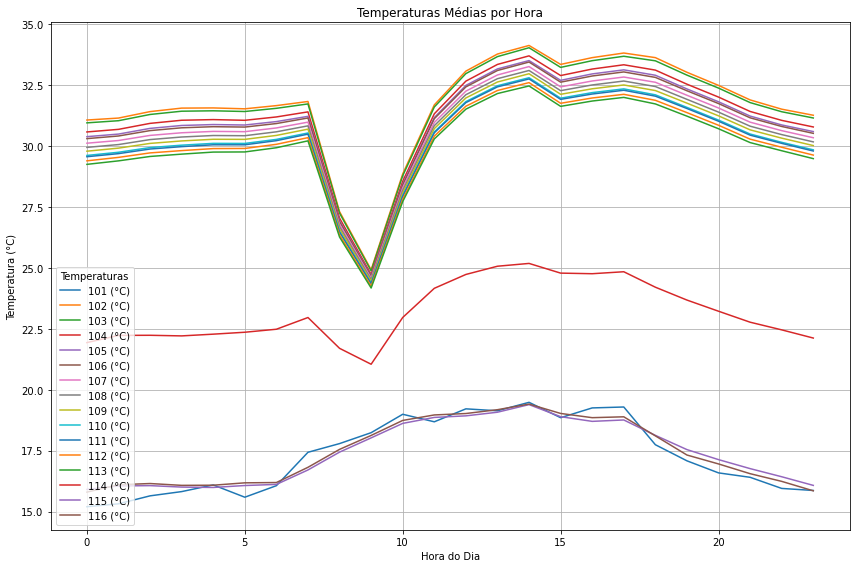

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import math 

# Carregar os dados a partir da linha correta (linha 40)
df_data_corrected = pd.read_excel('dados.xlsx', sheet_name='Planilha1', header=39)

# Coluna de tempo e colunas de temperatura
time_column = 'Scan Sweep Time (Sec)'
temperature_columns = [f'{i} (°C)' for i in range(101, 117)]

# Converter a coluna de tempo para considerar apenas as horas e agrupar os dados por hora
df_data_corrected['Hour'] = pd.to_datetime(df_data_corrected[time_column], errors='coerce').dt.hour

# Calcular a média simples das temperaturas para cada hora
df_grouped = df_data_corrected.groupby('Hour').mean()

# Plotar o gráfico com as médias horárias das temperaturas
plt.figure(figsize=(12, 8))

for temp_col in temperature_columns:
    plt.plot(df_grouped.index, df_grouped[temp_col], label=temp_col)

# Adicionar título e rótulos aos eixos
plt.title('Temperaturas Médias por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Temperaturas')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


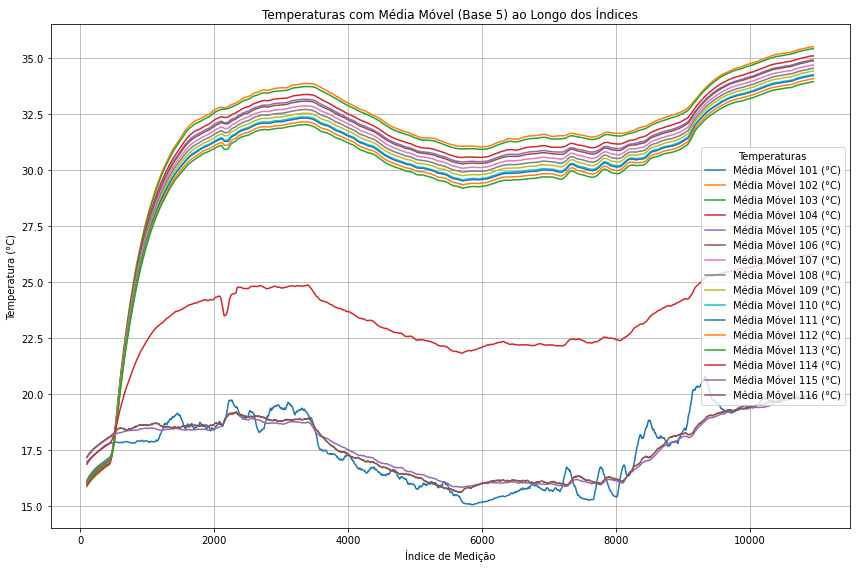

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados a partir da linha correta (linha 40)
df_data_corrected = pd.read_excel('dados.xlsx', sheet_name='Planilha1', header=39)

# Colunas de temperatura que iremos usar
temperature_columns = [f'{i} (°C)' for i in range(101, 117)]

# Criar uma coluna de índices de 1 até o tamanho das medições de temperatura
df_data_corrected['Index'] = range(1, len(df_data_corrected) + 1)

# Aplicar a média móvel com base 5 em cada coluna de temperatura
df_data_corrected_moving_avg = df_data_corrected.copy()
for temp_col in temperature_columns:
    df_data_corrected_moving_avg[temp_col] = df_data_corrected[temp_col].rolling(window=100).mean()

# Plotar o gráfico com os índices e a média móvel
plt.figure(figsize=(12, 8))

for temp_col in temperature_columns:
    plt.plot(df_data_corrected_moving_avg['Index'], df_data_corrected_moving_avg[temp_col], label=f'Média Móvel {temp_col}')

# Adicionar título e rótulos aos eixos
plt.title('Temperaturas com Média Móvel (Base 5) ao Longo dos Índices')
plt.xlabel('Índice de Medição')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Temperaturas')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


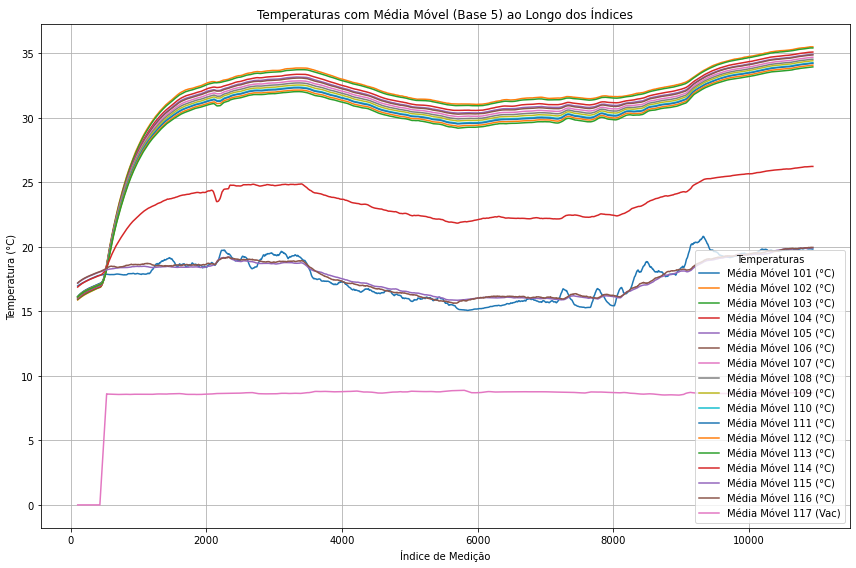

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados a partir da linha correta (linha 40)
df_data_corrected = pd.read_excel('dados.xlsx', sheet_name='Planilha1', header=39)

# Colunas de temperatura que iremos usar, incluindo "117 (Vac)"
temperature_columns = [f'{i} (°C)' for i in range(101, 117)]
temperature_columns.append('117 (Vac)')  # Adicionar a coluna "117 (Vac)"

# Criar uma coluna de índices de 1 até o tamanho das medições de temperatura
df_data_corrected['Index'] = range(1, len(df_data_corrected) + 1)

# Aplicar a média móvel com base 5 em cada coluna de temperatura
df_data_corrected_moving_avg = df_data_corrected.copy()
for temp_col in temperature_columns:
    df_data_corrected_moving_avg[temp_col] = df_data_corrected[temp_col].rolling(window=100).mean()

# Plotar o gráfico com os índices e a média móvel
plt.figure(figsize=(12, 8))

for temp_col in temperature_columns:
    plt.plot(df_data_corrected_moving_avg['Index'], df_data_corrected_moving_avg[temp_col], label=f'Média Móvel {temp_col}')

# Adicionar título e rótulos aos eixos
plt.title('Temperaturas com Média Móvel (Base 5) ao Longo dos Índices')
plt.xlabel('Índice de Medição')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Temperaturas')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


# Exercicio 2

# Exercício 3


### A) 

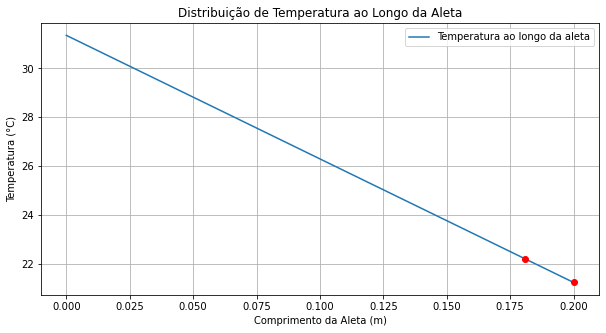

Valor de h: 9 W/(m²·K)


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Função de distribuição de temperatura considerando convecção na extremidade
def temperatura(m, l, h, x, k):
    num = math.cosh(m * (l - x)) + (h / m) * math.sinh(m * (l - x))
    den = math.cosh(m * l) + (h / m) * math.sinh(m * l)
    return num / den

def acha_k(T):
    a = (156.88 - 155.68) / (51.67 - 37.38)
    k_t = a*T - a*37.78 + 155.68
    return k_t

# Parâmetros e configuração
L = 0.2  # Comprimento total da aleta em metros
L_termopar = 0.181  # Posição do último termopar em metros
T_base = 31.35  # Temperatura na base em °C
T_ambiente = 15.61  # Temperatura ambiente em °C
theta_0 = T_base - T_ambiente
p = 2 * (0.012 + 0.2)  # Perímetro em metros
A = 0.012 * 0.2  # Área da seção transversal em m²
k = acha_k(30.43)  # Chamada da função para calcular k
h = 9  # Valor estimado de h
m = np.sqrt(h * p / k)  # Cálculo de m

# Preparando valores de x e calculando a temperatura
x_vals = np.linspace(0, L, 200)
theta_vals = [theta_0 * temperatura(m, L, h, x, k) + T_ambiente for x in x_vals]

# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(x_vals, theta_vals, label='Temperatura ao longo da aleta')
plt.scatter([L_termopar, L], [theta_0 * temperatura(m, L, h, L_termopar, k) + T_ambiente,
                             theta_0 * temperatura(m, L, h, L, k) + T_ambiente], color='red', zorder=5)
plt.title('Distribuição de Temperatura ao Longo da Aleta')
plt.xlabel('Comprimento da Aleta (m)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Valor de h: {h} W/(m²·K)")
